<a href="https://colab.research.google.com/github/faizan-abbas-mir/TSD/blob/main/ExponentialSmoothening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.holtwinters
from datetime import datetime


In [5]:
passengers= pd.read_csv('AirPassengers.csv')
passengers.head()


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
passengers.isnull().sum()

,0
Month,0
#Passengers,0


In [8]:
passengers['Month']=pd.to_datetime(passengers['Month'])

In [9]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [10]:
passengers=passengers.set_index('Month')

In [11]:
passengers

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [13]:
model= statsmodels.tsa.holtwinters.ExponentialSmoothing(
    passengers['#Passengers']
    ,trend='add'
    ,seasonal='add',
    seasonal_periods=12)
fit= model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [14]:
forecast= fit.forecast(24)

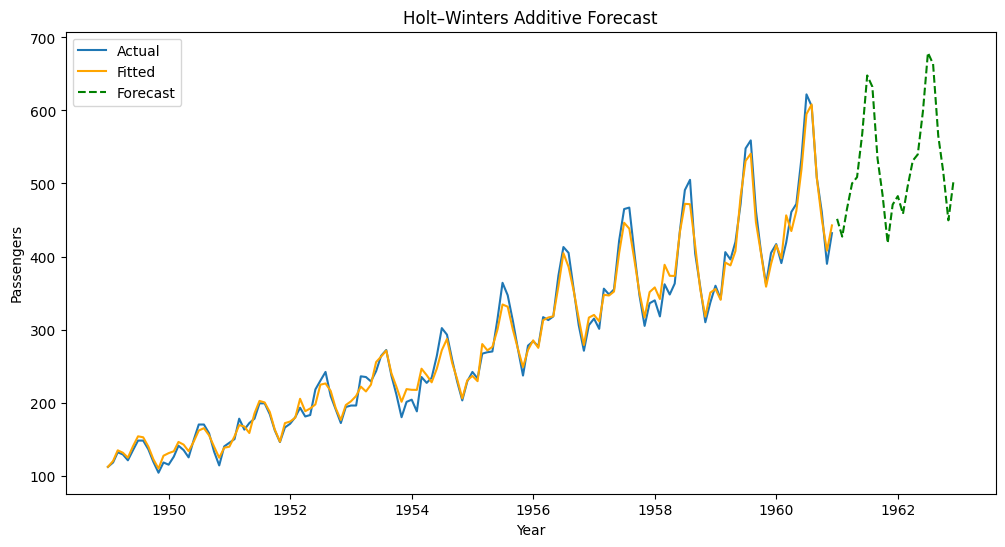

In [17]:
plt.figure(figsize=(12,6))
plt.plot(passengers.index, passengers["#Passengers"], label="Actual")
plt.plot(fit.fittedvalues.index, fit.fittedvalues, label="Fitted", color="orange")
plt.plot(forecast.index, forecast, label="Forecast", color="green", linestyle="--")
plt.title("Holt–Winters Additive Forecast")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend()
plt.show()